#AutoEncoders to regenerate images 
by Srinivas Prudhvi Somisetty(122021601001)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [11]:
(x_train, _), (x_test, _) = fashion_mnist.load_data() # declaring a variable with ( _ ) as we dont require labels from dataset ( _ )is a dummy variable

x_train = x_train.astype('float32') / 255.            # type casting the data and rescaling it will 255 to 0-1 values
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
latent_dim = 64                                                                 # input dimension for the model

class Autoencoder(Model):                                                       # creating a class for Autoencoder
  def __init__(self, latent_dim):                                               # initilizing the class with required objects of the model
    super(Autoencoder, self).__init__()                                         # creating a super class object to directly initilize the object of parent class 
    self.latent_dim = latent_dim                                                # creating aclass attribute for future reference and local utilization of variable
                                                                                # here the model is split into 2 pares of encoder and decoder for easy tuning and future proofing the model
    self.encoder = tf.keras.Sequential([
                                        layers.Flatten(),
                                        layers.Dense(latent_dim, activation='relu')
    ])                                                                          # creating an attribute to store encoder part of the model using the sequential api from keras 
                                                                                # flatern the input and then pass it to a dense node and output the data to decoder
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(784, activation='sigmoid'),
                                        layers.Reshape((28,28))
    ])                                                                          # creating an attribute to store decoder part of the model using the sequential api from keras 
                                                                                # connect the input from encoder to the same no one nodes when flattern and reshape the data back to origiinal dimensions

  def call(self, x):                                                            # defining the class function of the class 
    encoded = self.encoder(x)                                                   # calling the encoder part and sending the input into it  ::: i/p(encoder) <- dataset
    decoded = self.decoder(encoded)                                             # calling the decoder part and sending the encoder output as input of decoder  :: i/p(decoder) <- o/p(encoder)
    return decoded                                                              # return only the decoder output as it contains the reconstructed part of the images

autoencoder = Autoencoder(latent_dim)                                           # initilizing the class object

In [13]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())           # compiling the model with required loss function and optimizer

In [14]:
# here we train the model with same data for input and target as we need to reconstruct 
# the same image so X_train,Y_train = X_train and same follows for the validation set also

autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0087 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [15]:
# applying the model to new data
encoded_imgs = autoencoder.encoder(x_test).numpy()                              # calling the attributes of model to encode new data
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()                        # calling the attributes of model to decode new encoded data

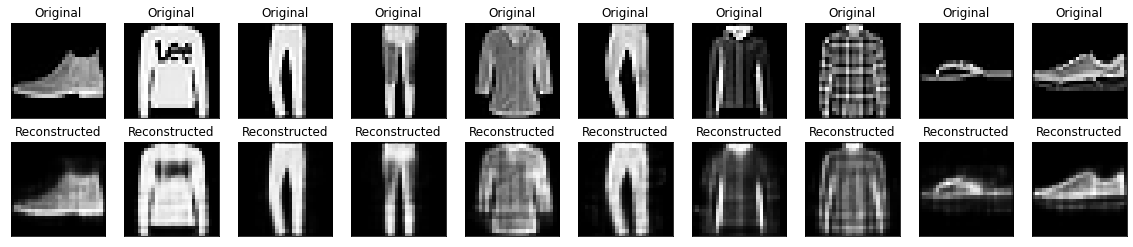

In [16]:
# plotting the images for comparision between original and reconstructed data
n = 10                                                                          # plotting only first 10 images
plt.figure(figsize=(20, 4))                                                     # initilizing the figure size for plot
for i in range(n):
  ax = plt.subplot(2, n, i + 1)                                                 # creating subplot rules for 1st row in the plot of original images
  plt.imshow(x_test[i])                                                         # plotting the original images 
  plt.title("Original")
  plt.gray()                                                                    # The gray() function is used to set the colormap to “gray”.
  ax.get_xaxis().set_visible(False)                                             # removing the visiblity of grid lines in plot
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)                                             # creating subplot rules for 2nd row in the plot of original images
  plt.imshow(decoded_imgs[i])                                                   # plotting the original images
  plt.title("Reconstructed")
  plt.gray()                                                                    # The gray() function is used to set the colormap to “gray”.
  ax.get_xaxis().set_visible(False)                                             # removing the visiblity of grid lines in plot
  ax.get_yaxis().set_visible(False)

plt.show()


In [17]:
autoencoder.summary()                                                           # print the model summary to understand the layers present 

Model: "autoencoder_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 64)                50240     
_________________________________________________________________
sequential_3 (Sequential)    (None, 28, 28)            50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


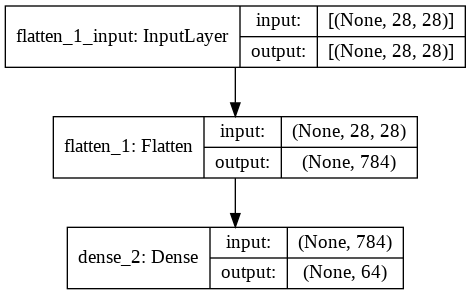

In [29]:
tf.keras.utils.plot_model(autoencoder.encoder, show_shapes=True)                # plotting the encoder part of the model 

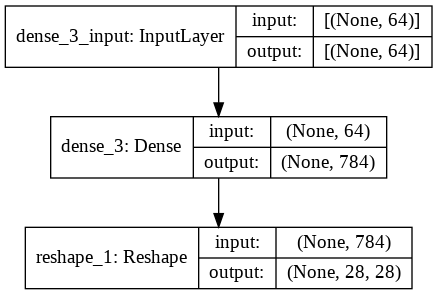

In [28]:
tf.keras.utils.plot_model(autoencoder.decoder, show_shapes=True)                # plotting the decoder part of the model 